# TP Final: Spotify (17Co2024)

#### Integrantes
- Adassus, Luciano
- De Pedro Mermier, Ignacio
- Cagua, Johnatan

---

# Propuesta de investigación

#### Objetivo:
Estimar la probabilidad de que una nueva canción sea del agrado de un usuario, basado en las características de su playlist actual.

#### Contexto:
En este análisis, la variable objetivo **`label`** representa la preferencia del usuario por una canción. Esta será la variable de salida que deseamos predecir a partir de una serie de características musicales como **acousticness**, **danceability**, **energy**, **loudness**, **loudness**, **instrumentalness** entre otras variables relacionadas a la musica.

# Exploración y Comprensión de los Datos

### Primeras observaciones del dataset

Cargamos el dataset y observamos sus primeras filas para familiarizarnos con su estructura.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Pre-processing y metricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

#Modelos
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

#PCA
from sklearn.decomposition import PCA

from collections import Counter
from IPython.display import Markdown, display
import requests



In [139]:
# Cargar el dataset
spotify_df = pd.read_csv("data_playlist.csv")

# Obtener el número de observaciones (filas) y variables (columnas)
num_observaciones = spotify_df.shape[0]
num_variables = spotify_df.shape[1]

# Contar el número de variables de cada tipo (ej: float64, int64)
tipos_de_datos = spotify_df.dtypes.value_counts()

# Crear la descripción incial del dataset
descripcion = f"""
El dataset cargado tiene las siguientes características principales:

- **Número de observaciones:** {num_observaciones}
- **Número de variables:** {num_variables}

Tipos de datos:
"""
for tipo, cantidad in tipos_de_datos.items():
    descripcion += f"- La mayoría de las variables son de tipo **{tipo}** ({cantidad} variables).\n"

# Mostrar el resultado como Markdown
display(Markdown(descripcion))


El dataset cargado tiene las siguientes características principales:

- **Número de observaciones:** 750
- **Número de variables:** 14

Tipos de datos:
- La mayoría de las variables son de tipo **float64** (9 variables).
- La mayoría de las variables son de tipo **int64** (5 variables).


---
#### Aquí se muestran las rimeras 15 observaciones del dataset para tener una idea inicial de las características de las canciones:

In [140]:
spotify_df.head(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.7130,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.1920,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.3330,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.6010,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.8830,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.5240,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.5970,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.4520,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.7480,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.9130,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


---
#### Aqui se muestran las ultimas 15 observaciones del dataset para tener una idea inicial de las características de las canciones:

In [141]:
spotify_df.tail(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
735,0.019000,0.429,184753,0.760,0.000000,7,0.1020,-5.434,1,0.3270,78.260,4,0.541,0
736,0.001160,0.601,148125,0.990,0.520000,6,0.1240,-3.016,1,0.3370,127.958,4,0.192,0
737,0.905000,0.579,101148,0.221,0.000001,0,0.1020,-9.664,1,0.0478,118.871,3,0.221,1
738,0.379000,0.503,233560,0.618,0.000000,7,0.1140,-6.060,0,0.0299,81.907,4,0.232,1
739,0.102000,0.803,216575,0.631,0.000007,8,0.0858,-4.213,1,0.0444,104.999,4,0.659,0
740,0.202000,0.755,216450,0.577,0.000000,3,0.2340,-7.549,1,0.1570,100.034,4,0.451,0
741,0.162000,0.710,309173,0.784,0.000623,0,0.1940,-6.865,1,0.0416,126.656,4,0.901,1
742,0.195000,0.887,231733,0.682,0.050300,4,0.0623,-7.795,1,0.0436,115.700,4,0.962,1
743,0.125000,0.480,110075,0.560,0.000000,1,0.1360,-7.868,1,0.3510,204.162,4,0.571,1
744,0.124000,0.519,242227,0.495,0.006260,6,0.1830,-11.002,0,0.1010,95.078,4,0.262,1


---
#### Aquí se muestra una descripción de cada columna e información general del dataframe: 

In [142]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


---
#### Valores nulos y duplicados

In [143]:
spotify_df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

> El dataset no presenta valores nulos, por lo que no es necesario utilizar técnicas de imputación de variables en este caso.

In [53]:
spotify_df.duplicated().sum()

14

In [54]:
spotify_df[spotify_df.duplicated()]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
83,0.046900,0.311,208467,0.3250,0.000000,2,0.1390,-9.042,1,0.0283,65.090,1,0.668,1
151,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
233,0.992000,0.525,228253,0.0553,0.933000,2,0.0934,-22.358,1,0.0633,67.325,4,0.256,1
263,0.025400,0.541,205200,0.8540,0.000125,2,0.6510,-6.196,1,0.1550,86.044,4,0.454,0
297,0.992000,0.525,226293,0.0633,0.905000,9,0.1050,-23.072,1,0.0497,71.855,4,0.297,1
301,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
426,0.182000,0.874,216248,0.7060,0.000000,1,0.3340,-5.132,1,0.2070,89.968,4,0.895,0
450,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1
537,0.137000,0.666,211931,0.9480,0.000000,10,0.1920,-2.776,1,0.0638,100.996,4,0.523,0
542,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1


# Análisis de las Variables

| Variable            | Tipo        | Descripción                                                                 |
|---------------------|-------------|-----------------------------------------------------------------------------|
| **acousticness**     | Continua    | Atributo que mide qué tan acústica es una canción.                          |
| **danceability**     | Continua    | Mide lo apta que es una canción para bailar.                                |
| **duration**         | Discreta    | Duración de una canción en milisegundos.                                    |
| **energy**           | Continua    | Mide la intensidad y actividad percibida de la canción.                     |
| **instrumentalness** | Continua    | Indica la probabilidad de que una pista no contenga voces.                  |
| **key**              | Discreta    | Representa la tonalidad musical de una canción (en semitonos).              |
| **liveness**         | Continua    | Detecta la presencia de una audiencia en la grabación.                      |
| **loudness**         | Continua    | Mide el volumen medio de la canción (en decibelios).                        |
| **mode**             | Binaria     | Indica si una pista está en modo mayor (1) o menor (0).                     |
| **speechiness**      | Continua    | Mide la cantidad de palabras habladas en la pista.                          |
| **tempo**            | Continua    | Mide el ritmo de la canción en beats por minuto (BPM).                      |
| **time_signature**   | Ordinal     | Representa la métrica de la canción (por ejemplo, 4/4).                     |
| **valence**          | Continua    | Mide el carácter musical de una pista en términos de positividad.           |
| **label**            | Binaria     | Variable objetivo que se desea predecir.                                    |

---

## Clasificación de Variables

#### 1. **Variables Numéricas**:
Estas variables son cuantitativas y se dividen en **discretas** y **continuas**.

##### **Lista de Variables Numéricas**:
- **Continuas**:
  - `acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, `valence`  
- **Discretas**:
  - `duration`

##### **Análisis**:
- **Tipo**: Continuas y discretas.
- **Distribución de los datos**:
  - Utilizar **histogramas** para visualizar la distribución de cada variable.
  - Usar medidas como la **media**, **mediana**, **desviación estándar** y **percentiles**.
- **Conclusiones esperadas**:
  - Identificar **distribuciones simétricas**, **sesgadas** o la presencia de **valores atípicos (outliers)**.
  
##### **Gráficos sugeridos para Variables Numéricas**:
- **Histogramas**: Para visualizar la distribución de los datos y observar si son simétricos o sesgados.
- **Boxplots**: Para identificar la presencia de valores atípicos y comparar distribuciones.
  
---

#### 2. **Variables Categóricas**:
Estas variables agrupan los datos en categorías y se dividen en **nominales**, **ordinales** y **binarias**.

##### **Lista de Variables Categóricas**:
- **Nominales**:
  - `key`, `mode`  
- **Ordinales**:
  - `time_signature`  
- **Binarias**:
  - `label`

##### **Análisis**:
- **Tipo**: Nominales, ordinales y binarias.
- **Cardinalidad**:
  - Evaluar el número de categorías presentes en cada variable y su **frecuencia**.
  - Identificar si hay **categorías comunes** o **raras**.
- **Representación**:
  - Usar **gráficos de barras** o **countplots** para visualizar la distribución de las categorías.
- **Conclusiones esperadas**:
  - Determinar si algunas categorías son demasiado **raras** o **comunes**, lo que podría impactar en el modelo.
  - Evaluar si las variables categóricas tienen una **distribución uniforme** o están desbalanceadas.

##### **Gráficos sugeridos para Variables Categóricas**:
- **Gráficos de barras**: Para mostrar la frecuencia de cada categoría.
- **Countplots**: Para contar y visualizar la frecuencia de las categorías.

---

### Resumen de Gráficos Sugeridos

#### **Variables Numéricas**:
- **Histogramas**: Para observar la **distribución** de cada variable numérica y detectar si hay sesgo.
- **Boxplots**: Para detectar **valores atípicos** en las variables numéricas y comparar su rango.

#### **Variables Categóricas**:
- **Gráficos de barras** o **countplots**: Para visualizar la **frecuencia de categorías** en las variables categóricas.


### Estadísticas Resumidas de las variables

A continuación se presentan las estadísticas descriptivas de las variables, que incluyen la media, desviación estándar, cuartiles, y valores mínimo y máximo. Estas estadísticas nos permiten comprender mejor la distribución general de los datos.

In [144]:
spotify_df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


### Análisis de Sesgo en las Distribuciones de las Variables Numéricas
Se analiza el sesgo en las distribuciones de las variables numéricas para identificar posibles desviaciones significativas que puedan requerir transformaciones.

In [145]:
# Cálculo de sesgo
skewness = spotify_df.select_dtypes(include=['float64']).skew().sort_values(ascending=False)
print("Sesgo de las variables:")
print(skewness)

Sesgo de las variables:
instrumentalness    2.488166
liveness            2.156240
speechiness         2.040370
acousticness        0.534804
tempo               0.334763
valence             0.104812
danceability       -0.311981
energy             -0.458765
loudness           -1.693115
dtype: float64


##### Conclusiones:

- Las variables **instrumentalness**, **liveness**, y **speechiness** muestran distribuciones muy sesgadas, lo que podría indicar la necesidad de transformaciones (por ejemplo, una transformación logarítmica) para mejorar la simetría en los análisis posteriores.
- **acousticness** también tiene un sesgo positivo moderado, por lo que también podría beneficiarse de una transformación en algunos casos. Lo mismo ocurre con **energy** pero con una magnitud negativa.
- La variable **loudness** muestra un sesgo negativo, lo que sugiere que la mayoría de las canciones tienen valores altos en esta métrica.

##### Recomendaciones Iniciales:
- **Transformar variables sesgadas**: Para aquellas variables con un sesgo alto (mayor a 1 o menor a -1), puedes considerar aplicar transformaciones logarítmicas u otras técnicas para reducir el sesgo y obtener distribuciones más simétricas, lo cual puede mejorar el rendimiento en los modelos predictivos.

### Detección de Anomalías en Variables Clave

Ahora se identificarán valores fuera de los rangos típicos para algunas variables clave como **duration**, **tempo**, y **loudness**. Estos valores pueden ser indicativos de outliers que podrían afectar los análisis posteriores.

In [146]:
# Definimos los rangos esperados para algunas variables clave
expected_ranges = {
    'tempo': (50, 200),  # BPM típicos
    'duration': (60000, 600000),  # Entre 1 y 10 minutos
    'loudness': (-60, 0)  # Valores de decibelios típicos
}

# Detectamos valores fuera de rango
anomalies = {}
for var, (min_val, max_val) in expected_ranges.items():
    anomalies[var] = spotify_df[(spotify_df[var] < min_val) | (spotify_df[var] > max_val)]
    
# Mostramos las anomalías detectadas
for var, anoms in anomalies.items():
    if not anoms.empty:
        print(f"Anomalías encontradas en {var}:")
        print(anoms[[var]])
    else:
        print(f"No se encontraron anomalías en {var}.")

Anomalías encontradas en tempo:
       tempo
195  201.843
350  203.927
377  203.669
649  201.800
654  203.988
743  204.162
Anomalías encontradas en duration:
     duration
215     46107
241    675360
351     55653
449     58671
488     33840
651     56331
700     48093
730    618400
No se encontraron anomalías en loudness.


### Target
Nuestro objetivo va a ser predecir si una canción es del agrado del usuario. Para eso, revisamos la distribución de la variable objetivo label (canciones preferidas (1) y no preferidas (0))

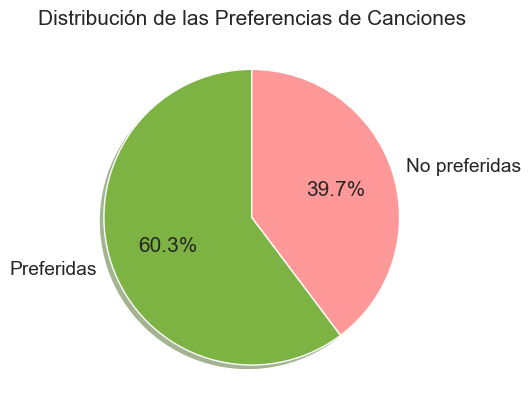

In [147]:
palette = {
    0: '#ff9999',  # Rojo
    1: '#7CB342',   # Verde
    -1: '#ffff99'   # Amarillo
}

target_esn = {
    0: 'Preferidas',
    1: 'No preferidas'
}

fig, ax = plt.subplots()
ax.pie(spotify_df.label.value_counts(), 
       labels=[target_esn[0], target_esn[1]], shadow={'ox': -0.02, 'edgecolor': 'none', 'shade': 0.4},
       colors=[palette[1], palette[0]], autopct='%1.1f%%', startangle=90)
plt.title("Distribución de las Preferencias de Canciones")
plt.show()

### Visualización de Distribuciones para la Variables Numéricas

Utilizamos histogramas y boxplots para visualizar las distribuciones y posibles valores atípicos.

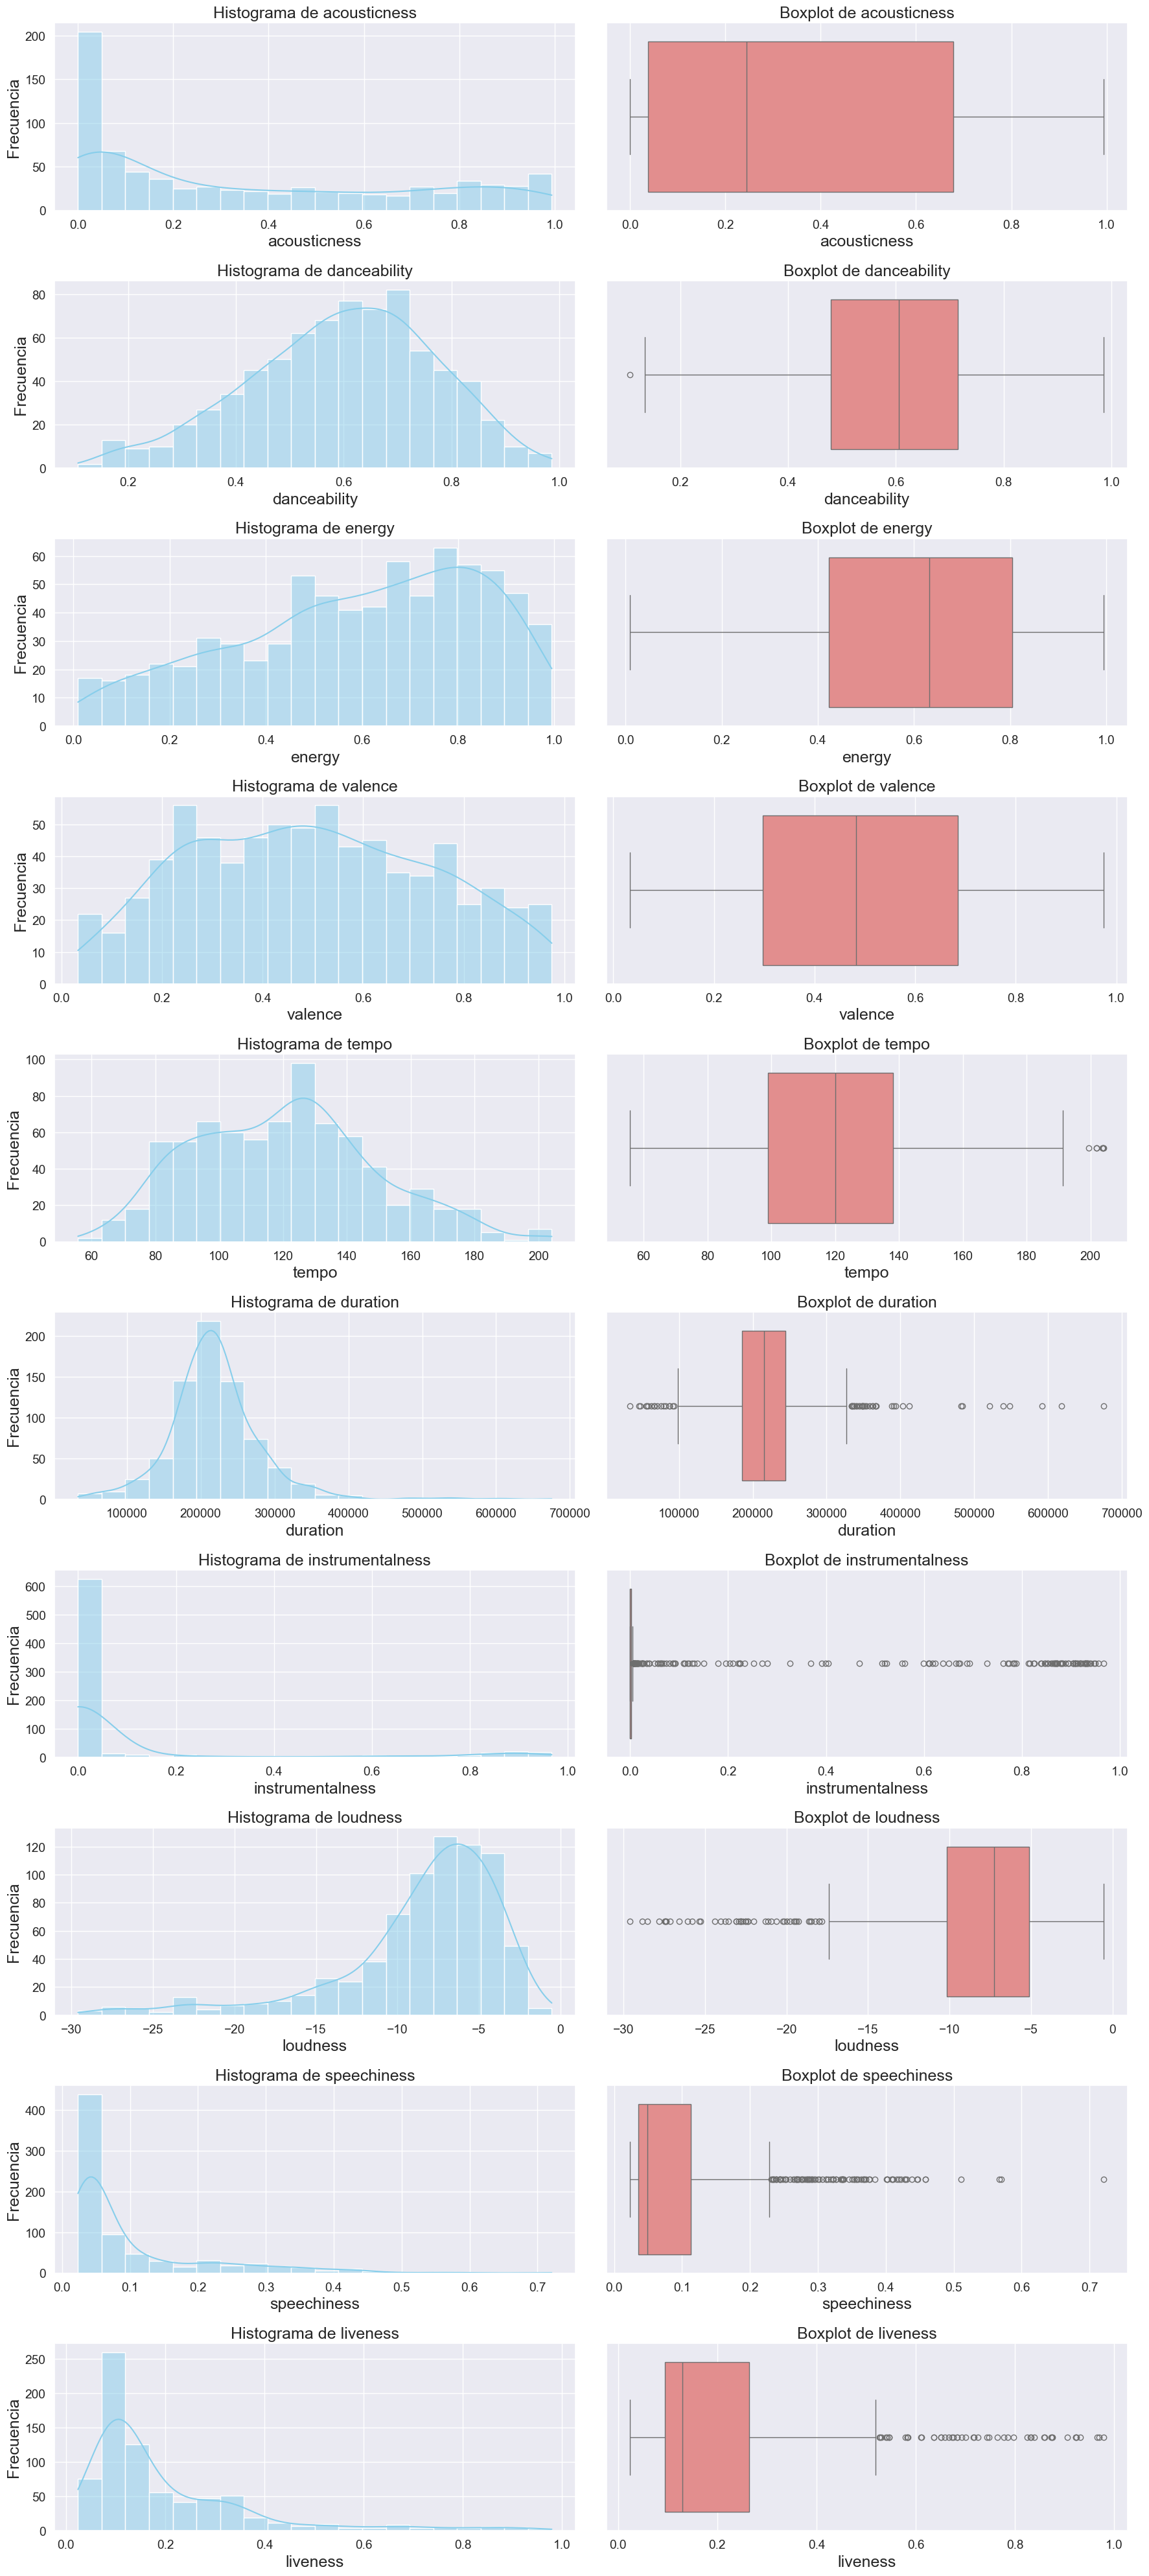

In [148]:
# Variables numéricas
variables_numericas = ['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'duration', 
                       'instrumentalness', 'loudness', 'speechiness', 'liveness']

# Aumentar el tamaño de la figura
plt.figure(figsize=(18, 40))  # Aumentar un poco más el tamaño de los gráficos

for i, variable in enumerate(variables_numericas, 1):
    # Histograma
    plt.subplot(10, 2, i*2-1)
    sns.histplot(spotify_df[variable], bins=20, kde=True, color='skyblue')
    plt.title(f'Histograma de {variable}', fontsize=18)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=18)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=18)  # Aumentar el tamaño del eje Y
    
    # Boxplot
    plt.subplot(10, 2, i*2)
    sns.boxplot(x=spotify_df[variable], color='lightcoral')
    plt.title(f'Boxplot de {variable}', fontsize=18)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=18)  # Aumentar el tamaño del eje X

# Añadir espacio entre las filas
plt.subplots_adjust(hspace=0.6)  # Ajusta el espacio entre filas (0.6 para mayor separación)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#### Conclusión de los Gráficos para las Variables Numéricas

- **Acousticness**: La mayoría de las canciones tienen valores bajos de acústica, pero se observan algunas con valores más altos. El boxplot muestra pocos valores atípicos.
- **Danceability**: Muchas canciones tienen una alta bailabilidad, con un pico entre 0.5 y 0.7. El boxplot muestra que la distribución está centrada alrededor de la mediana.
- **Energy**: La energía de las canciones tiende a concentrarse en valores medios a altos, y el boxplot muestra una distribución razonablemente uniforme.
- **Valence**: La positividad de las canciones está distribuida de manera uniforme, pero con un ligero aumento hacia valores más bajos.
- **Tempo**: La mayoría de las canciones están en el rango de 90-150 BPM, lo que sugiere un tempo promedio.
- **Duration**: Las canciones tienden a durar entre 150,000 y 250,000 milisegundos (2.5 a 4 minutos), con algunos valores atípicos.
- **Instrumentalness**: La mayoría de las canciones no son instrumentales, con valores cercanos a cero.
- **Loudness**: Los niveles de volumen varían, pero las canciones suelen estar en un rango de volumen moderado, sin demasiados outliers.
- **Speechiness**: La mayoría de las canciones tienen poca o ninguna cantidad de palabras habladas.
- **Liveness**: La mayoría de las canciones tienen poca o ninguna presencia de público en la grabación.

### Visualización de Distribuciones para la Variables Categoricas

Usamos gráficos de barras para mostrar la distribución de las categorías.

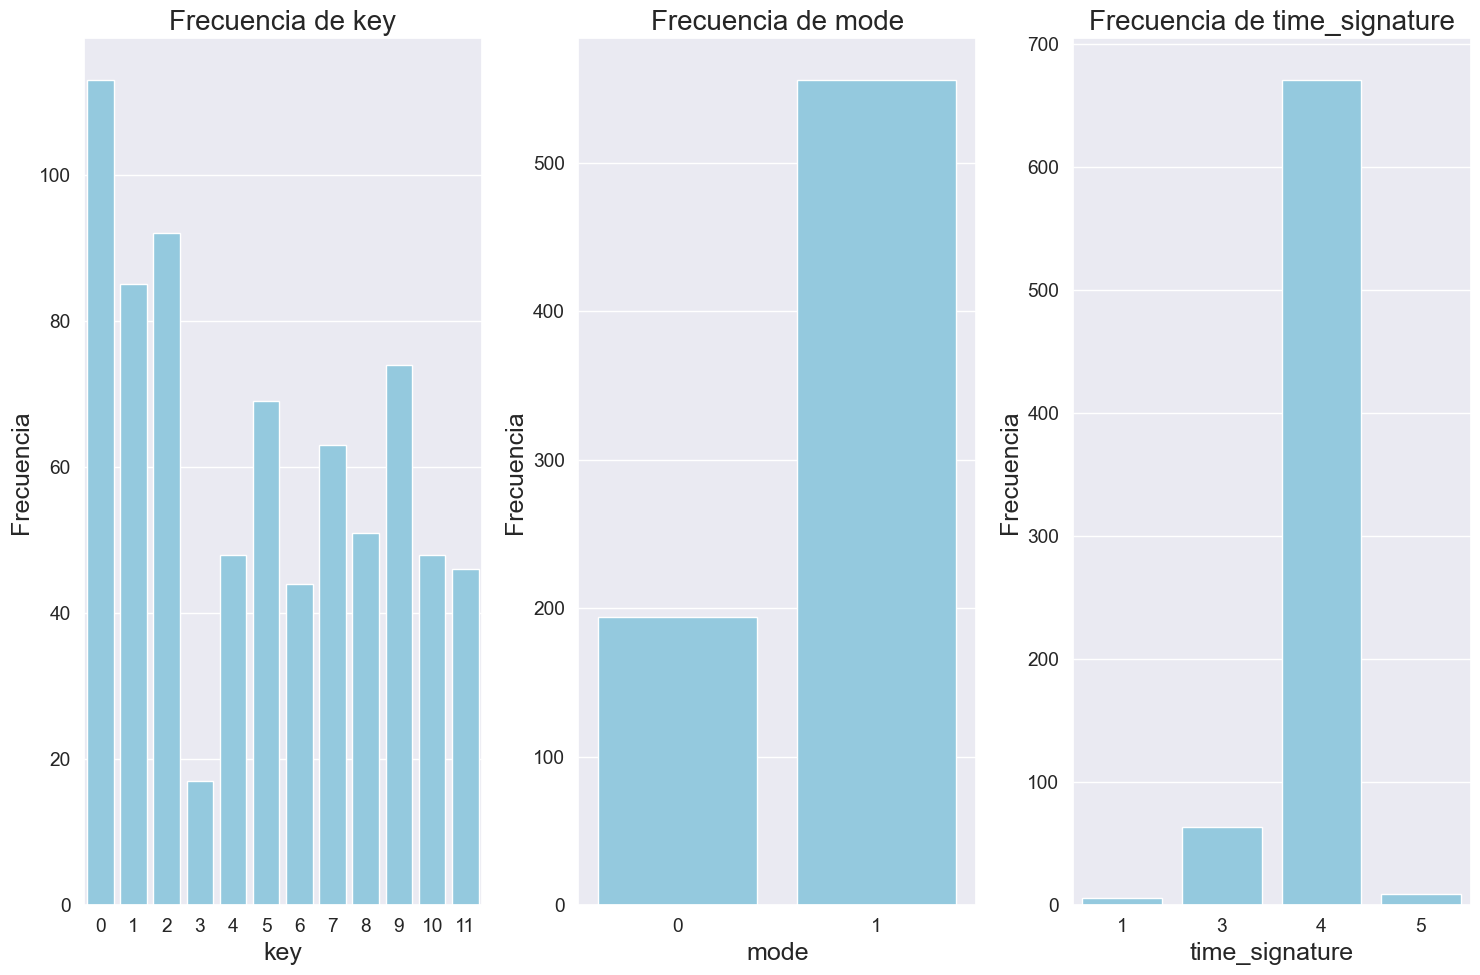

In [149]:
# Variables categóricas
variables_categoricas = ['key', 'mode', 'time_signature']

# Crear un gráfico para cada variable categórica con gráficos y letras más grandes
plt.figure(figsize=(20, 10))  # Aumentar el tamaño general de la figura

for i, variable in enumerate(variables_categoricas, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=variable, data=spotify_df, color='skyblue')
    plt.title(f'Frecuencia de {variable}', fontsize=20)  # Aumentar el tamaño del título
    plt.xlabel(variable, fontsize=18)  # Aumentar el tamaño del eje X
    plt.ylabel('Frecuencia', fontsize=18)  # Aumentar el tamaño del eje Y

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#### Conclusión de los Gráficos para las Variables Categóricas

- **Key**: La variable key, que representa la nota principal de la canción, está distribuida uniformemente entre varios valores. No hay claves que dominen significativamente sobre otras.
- **Mode**: La mayoría de las canciones están en **modo mayor** (representado por el valor de 1), lo cual es común en muchas canciones comerciales.
- **Time Signature**: La mayoría de las canciones tienen un compás de **4 tiempos**, lo cual es el estándar en la mayoría de las canciones pop y mainstream.

### Visualización de Características por Preferencias
Se muestran distribuciones utilizando la variable label (cancion que es preferencia del usuario, cancion que no es preferencia del usuario) como separador.

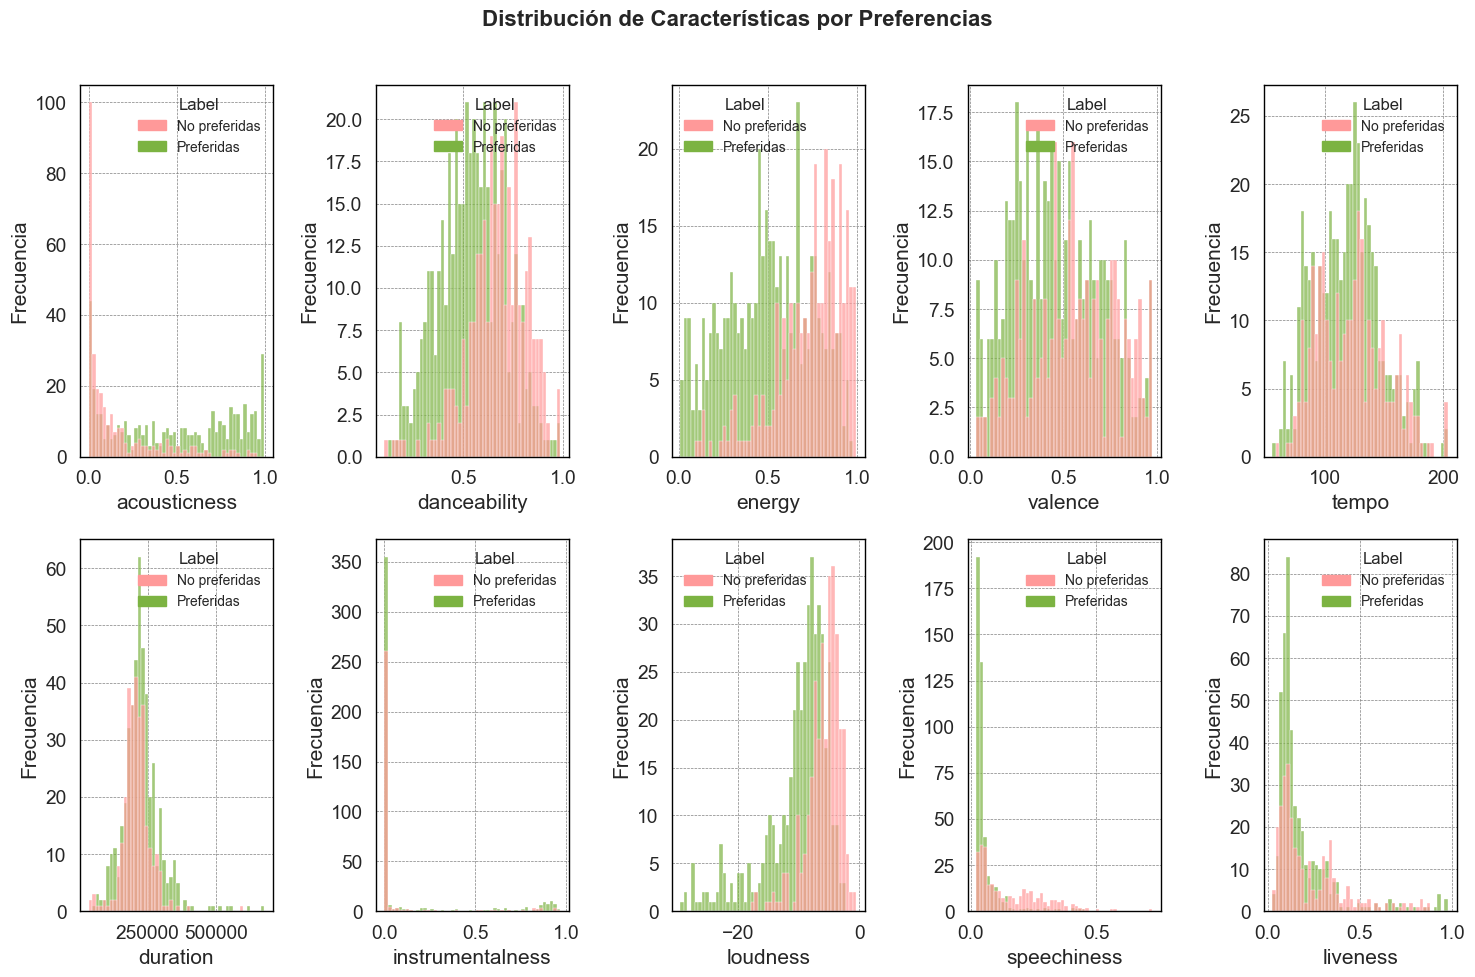

In [150]:
import matplotlib.patches as patches

# Número de columnas
n_columns = 5
# Calcular el número de filas necesario
n_rows = (len(variables_numericas) + n_columns - 1) // n_columns  

# Crear la figura y los ejes para la cuadrícula de histogramas
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5 * n_rows), squeeze=False)

fig.suptitle('Distribución de Características por Preferencias', fontsize=16, fontweight='bold')

# Graficar histogramas según target
for idx, feature in enumerate(variables_numericas):
    row = idx // n_columns
    col = idx % n_columns
    ax = axes[row, col]
    
    sns.histplot(data=spotify_df, x=feature, hue='label', bins=50, alpha=0.7, palette=palette, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frecuencia')
    
    handles = [patches.Patch(color=palette[0], label=target_esn[1]), patches.Patch(color=palette[1], label=target_esn[0])]
    legend = ax.legend(handles=handles, title='Label', fontsize=10, title_fontsize=12)
    
    ax.set_facecolor('#ffffff')  # Fondo blanco para el área de trazado
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Borde negro en el área de trazado
        spine.set_linewidth(1)  # Grosor del borde del área de trazado
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    
    legend.set_frame_on(False)  # Habilitar el marco de la leyenda
    legend.get_frame().set_edgecolor('black')  # Color del borde de la leyenda
    legend.get_frame().set_linewidth(1)  # Grosor del borde de la leyenda

# Eliminar ejes vacíos si hay menos gráficos que subplots
for idx in range(len(variables_numericas), n_rows * n_columns):
    row = idx // n_columns
    col = idx % n_columns
    fig.delaxes(axes[row, col])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout(rect=[0, 0, 1, 0.97]) 

plt.show()

### Conclusiones

Se puede observar algunas cualidades segun el feature a analizar:
- **Acousticness:** Generalmente prefieren valores de acousticness alto, mientras que no prefieren canciones con acousticness bajo.
- **Danceability:** La media de las canciones que son preferencia es menor que la media de las canciones que no son preferidas.
- **Energy:** La distribucion de las canciones que prefieren suele tener una tendencia más uniforme, mientras que las canciones que no prefieren se concentran en valores cercanos a 1.
- **Loudness:** La media de canciones que prefieren tienden a los -10dB (menor volumen) mientras que la media de las canciones que no prefieren tienen a los -5dB (más volumen).
- **Speechiness:** Las canciones que prefieren están mas concentradas en valores bajos de speechines mientras que las canciones que no prefieren tienen a estar más distribuídas dentro del rango de posibles variables.

### Análisis de Correlación

Se genera una matriz de correlación para identificar relaciones importantes entre las variables.

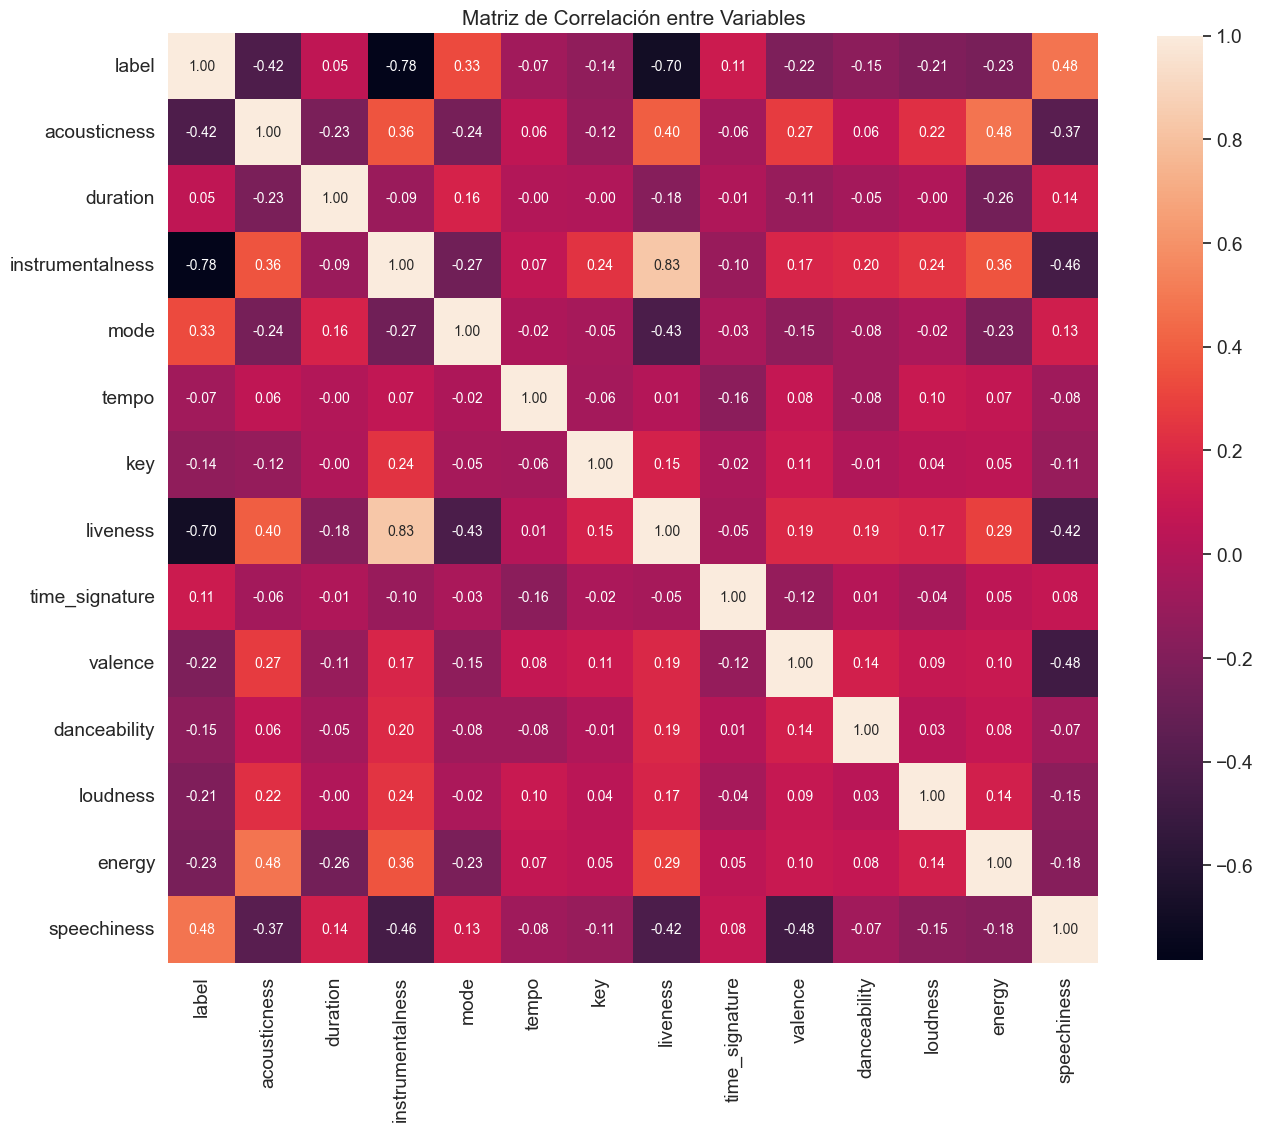

In [151]:
# Generar la matriz de correlación
correlation_matrix = spotify_df.corr()

# Generar una máscara para el triángulo superior (opcional)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
k = 18
cols = correlation_matrix.nlargest(k, 'label')['label'].index
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15,15))  
hm = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, cbar_kws={"shrink": 0.80},
                 yticklabels=cols.values, xticklabels=cols.values)

plt.title('Matriz de Correlación entre Variables')
plt.show()

#### Interpretación de la Matriz de Correlación:

El mapa de calor muestra las correlaciones entre las variables del dataset. Las relaciones más relevantes observadas son:

- **Energy** y **Loudness** tienen una correlación positiva moderada. Esto sugiere que las canciones más enérgicas tienden a ser más fuertes, lo cual es intuitivo, ya que las canciones con mayor energía suelen tener mayor volumen para resaltar su intensidad.
  
- **Danceability** y **Valence** también muestran una correlación positiva moderada. Esto indica que las canciones que son más alegres (valence) tienden a ser más fáciles de bailar (danceability). Las canciones con un estado emocional positivo parecen estar diseñadas para promover una mayor interacción física, como el baile.

- **Instrumentalness** presenta una correlación negativa tanto con **Danceability** como con **Energy**. Esto podría sugerir que las canciones instrumentales suelen ser menos bailables y menos energéticas. Esto es comprensible, ya que las canciones con pocas o ninguna vocalización suelen tener un enfoque más calmado o ambiental, lo que puede hacerlas menos aptas para el baile o para transmitir altos niveles de energía.

- **Speechiness** tiene una relación positiva leve con **Valence**, lo que podría sugerir que las canciones con más contenido hablado tienden a ser ligeramente más "felices". Sin embargo, esta correlación es baja, lo que sugiere que la relación no es muy fuerte.

- **Tempo** tiene una correlación débil con la mayoría de las variables, lo que sugiere que la velocidad de la canción en sí misma no es un factor determinante en características como **danceability**, **energy**, o **valence**. Esto indica que otros elementos musicales, además del ritmo, juegan un papel más importante en la percepción de estas características.

> #### Conclusión:
La matriz de correlación ofrece una visión clara de cómo interactúan ciertas características musicales. Las correlaciones más fuertes, como entre **energy** y **loudness**, son coherentes con las expectativas sobre la música enérgica, mientras que las relaciones negativas como la de **instrumentalness** con **danceability** y **energy** revelan que las canciones más instrumentales tienden a tener un carácter más calmado y menos rítmico. Estas observaciones pueden ser clave para entender las preferencias musicales de los usuarios y mejorar las recomendaciones de canciones.

#### Selección de Variables Basadas en Correlación de Pearson:

Para mejorar el rendimiento de los modelos de machine learning, eliminaremos variables que están altamente correlacionadas. 
Definimos un umbral de correlación del 0.9 para identificar aquellas variables que comparten una cantidad significativa de información pero que no son completamente redundantes.

Variables con correlaciones en este rango pueden ser consideradas para revisión y posibles eliminaciones.

In [152]:
# Definir el umbral de correlación
correlation_threshold = 0.9

# Crear una matriz de correlación para todas las variables
correlation_matrix = spotify_df.corr()

# Encontrar las columnas que están altamente correlacionadas
# Seleccionamos las correlaciones que están por encima del umbral
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Mostrar las variables con alta correlación (por encima del umbral)
if high_correlation_pairs:
    print("Variables altamente correlacionadas (correlación > 0.9):")
    for pair in high_correlation_pairs:
        print(f"{pair[0]} y {pair[1]}: {pair[2]:.2f}")
else:
    print("No se encontraron variables con correlación mayor a 0.9.")

# Eliminar una de las variables altamente correlacionadas (si corresponde)
variables_a_eliminar = [pair[0] for pair in high_correlation_pairs]
spotify_df_filtrado = spotify_df.drop(columns=variables_a_eliminar)

print(f"Variables eliminadas: {variables_a_eliminar}")
print(f"El dataset ahora tiene {spotify_df_filtrado.shape[1]} variables.")

No se encontraron variables con correlación mayor a 0.9.
Variables eliminadas: []
El dataset ahora tiene 14 variables.


## Eliminar los valores duplicados

In [153]:
# Identificar registros duplicads
spotify_df[spotify_df.duplicated()]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
83,0.046900,0.311,208467,0.3250,0.000000,2,0.1390,-9.042,1,0.0283,65.090,1,0.668,1
151,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
233,0.992000,0.525,228253,0.0553,0.933000,2,0.0934,-22.358,1,0.0633,67.325,4,0.256,1
263,0.025400,0.541,205200,0.8540,0.000125,2,0.6510,-6.196,1,0.1550,86.044,4,0.454,0
297,0.992000,0.525,226293,0.0633,0.905000,9,0.1050,-23.072,1,0.0497,71.855,4,0.297,1
301,0.586000,0.565,238933,0.4610,0.000000,0,0.1620,-7.273,1,0.1410,157.894,4,0.199,1
426,0.182000,0.874,216248,0.7060,0.000000,1,0.3340,-5.132,1,0.2070,89.968,4,0.895,0
450,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1
537,0.137000,0.666,211931,0.9480,0.000000,10,0.1920,-2.776,1,0.0638,100.996,4,0.523,0
542,0.166000,0.708,213440,0.6660,0.000229,2,0.0929,-7.042,1,0.0349,89.019,4,0.834,1


Existen 14 registros duplicados por lo cual debemos eliminarlos del dataset original

In [154]:
spotify_df_filter = spotify_df[~spotify_df.duplicated()]
# Reiniciar los índices si es necesario
spotify_df_filter = spotify_df_filter.reset_index(drop=True)
spotify_df_filter

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713000,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192000,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333000,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601000,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883000,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
732,0.001970,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
733,0.916000,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
734,0.168000,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1


## Detectar y manejar los outliers utilizando técnicas estadísticas o visuales apropiadas

Al visualizar el histograma de instrumentalness podemos deducir que la mayor cantidad de información se encuentra concentrada en valores muy cercanos a 0. Por lo tanto, podríamos considerar a todo lo que está por fuera de los máximos y minimos (no atípicos) como outliers (cualquier valor mayor a 0.01). Sin embargo, en este caso tomamos la decisión de realizar una discretización de dichos valores en categorias binarias 0/1 con el fin de mantener la información de "instrumentalness" pero con una cantidad de memoria mucho menor (ya que transformamos la variable).

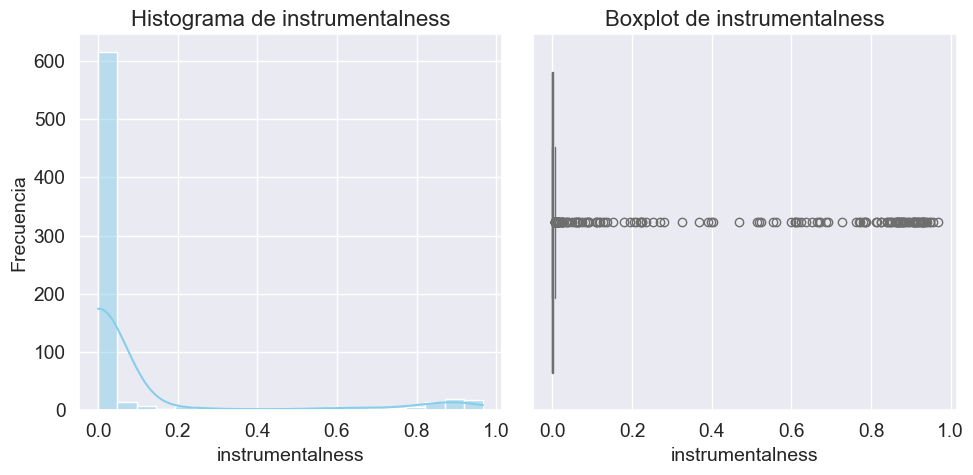

In [155]:
# Crear un gráfico para cada variable numérica con gráficos más grandes y letras más grandes
plt.figure(figsize=(10, 5))  # Aumentar el tamaño de los gráficos

variable = 'instrumentalness'

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(spotify_df_filter[variable], bins=20, kde=True, color='skyblue')
plt.title(f'Histograma de {variable}', fontsize=16)  # Aumentar el tamaño del título
plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X
plt.ylabel('Frecuencia', fontsize=14)  # Aumentar el tamaño del eje Y

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=spotify_df_filter[variable], color='lightcoral')
plt.title(f'Boxplot de {variable}', fontsize=16)  # Aumentar el tamaño del título
plt.xlabel(variable, fontsize=14)  # Aumentar el tamaño del eje X

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

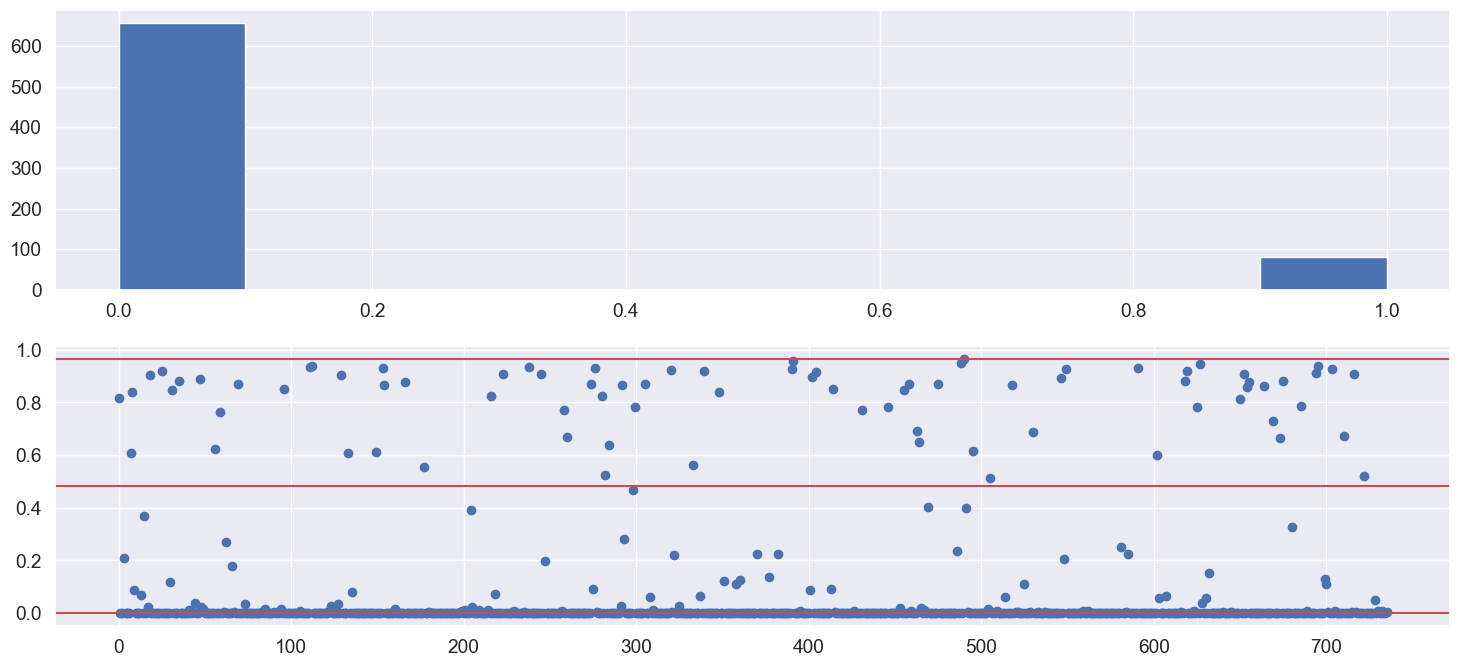

In [156]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
kbins = KBinsDiscretizer(n_bins=2, encode= 'ordinal' , strategy= 'uniform' )
data_tf_uniform = kbins.fit_transform(spotify_df_filter['instrumentalness'].values.reshape(-1,1))
fig,axes = plt.subplots(2,figsize=(18,8))
axes[0].hist(data_tf_uniform, bins=10);
axes[1].scatter(np.arange(0,spotify_df_filter['instrumentalness'].shape[0]),spotify_df_filter['instrumentalness'].values)
[axes[1].axhline(x,color='r') for x in kbins.bin_edges_[0]];

> Vemos que quedan la mayoria de los datos en 0, y una menor proporción (pero no insignificativa) en 1, con un umbral ubicado en 0.4835

In [157]:
spotify_df_filter['instrumentalness'] = data_tf_uniform

In [67]:
spotify_df_filter

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713000,0.514,100125,0.521,1.0,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192000,0.714,207019,0.614,0.0,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333000,0.630,216200,0.455,0.0,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601000,0.810,136413,0.221,0.0,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883000,0.465,181440,0.459,0.0,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.000175,0.374,333827,0.943,0.0,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
732,0.001970,0.487,213000,0.867,0.0,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
733,0.916000,0.605,125867,0.314,0.0,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
734,0.168000,0.700,249493,0.823,0.0,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1


# Encoding de variables categoricas

Los features key y time_signature, al ser variables categoricas pueden ser codificadas por medio de un encoder. Sin embargo, debido a que las mismas ya se encuentran codificadas por medio de numeros, este proceso no es necesario.

# Escalamiento de variables

Los features duration, tempo y loudness poseen un dominio que excede el rango entre 0 y 1 por lo que es necesario escalar estas variables para la correcta utilizacion de modelos.

In [158]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler, StandardScaler

spotify_df_filter_scaler = spotify_df_filter.drop(['duration','tempo','loudness'],axis=1)
spotify_df_filter_scaler

scaler = MinMaxScaler()  # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

variable = ['duration']
scaled_duration = scaler.fit_transform(spotify_df_filter[variable])
scaled_duration = pd.DataFrame(scaled_duration, columns=variable)


variable = ['tempo']
scaled_tempo = scaler.fit_transform(spotify_df_filter[variable])
scaled_tempo = pd.DataFrame(scaled_tempo, columns=variable)


variable = ['loudness']
scaled_loudness = scaler.fit_transform(spotify_df_filter[variable])
scaled_loudness = pd.DataFrame(scaled_loudness, columns=variable)

spotify_df_filter_scaler['duration'] = scaled_duration
spotify_df_filter_scaler['tempo'] = scaled_tempo
spotify_df_filter_scaler['loudness'] = scaled_loudness


spotify_df_filter_scaler

,acousticness,danceability,energy,instrumentalness,key,liveness,mode,speechiness,time_signature,valence,label,duration,tempo,loudness
0,0.713000,0.514,0.521,1.0,8,0.1120,0,0.0444,4,0.143,1,0.103325,0.432113,0.507981
1,0.192000,0.714,0.614,0.0,4,0.2630,1,0.0319,4,0.582,1,0.269951,0.459671,0.779758
2,0.333000,0.630,0.455,0.0,5,0.1270,1,0.0292,4,0.199,1,0.284262,0.567220,0.698741
3,0.601000,0.810,0.221,0.0,5,0.1840,1,0.0429,4,0.798,1,0.159891,0.365280,0.639741
4,0.883000,0.465,0.459,0.0,6,0.0692,0,0.0351,4,0.288,1,0.230079,0.236229,0.738406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0.000175,0.374,0.943,0.0,6,0.1250,0,0.0556,4,0.338,0,0.467619,0.379591,0.877013
732,0.001970,0.487,0.867,0.0,10,0.0968,0,0.0543,4,0.403,0,0.279274,0.702766,0.905050
733,0.916000,0.605,0.314,0.0,0,0.3590,1,0.0327,4,0.836,1,0.143451,0.555207,0.755814
734,0.168000,0.700,0.823,0.0,3,0.1220,1,0.0373,4,0.745,1,0.336159,0.595041,0.781237


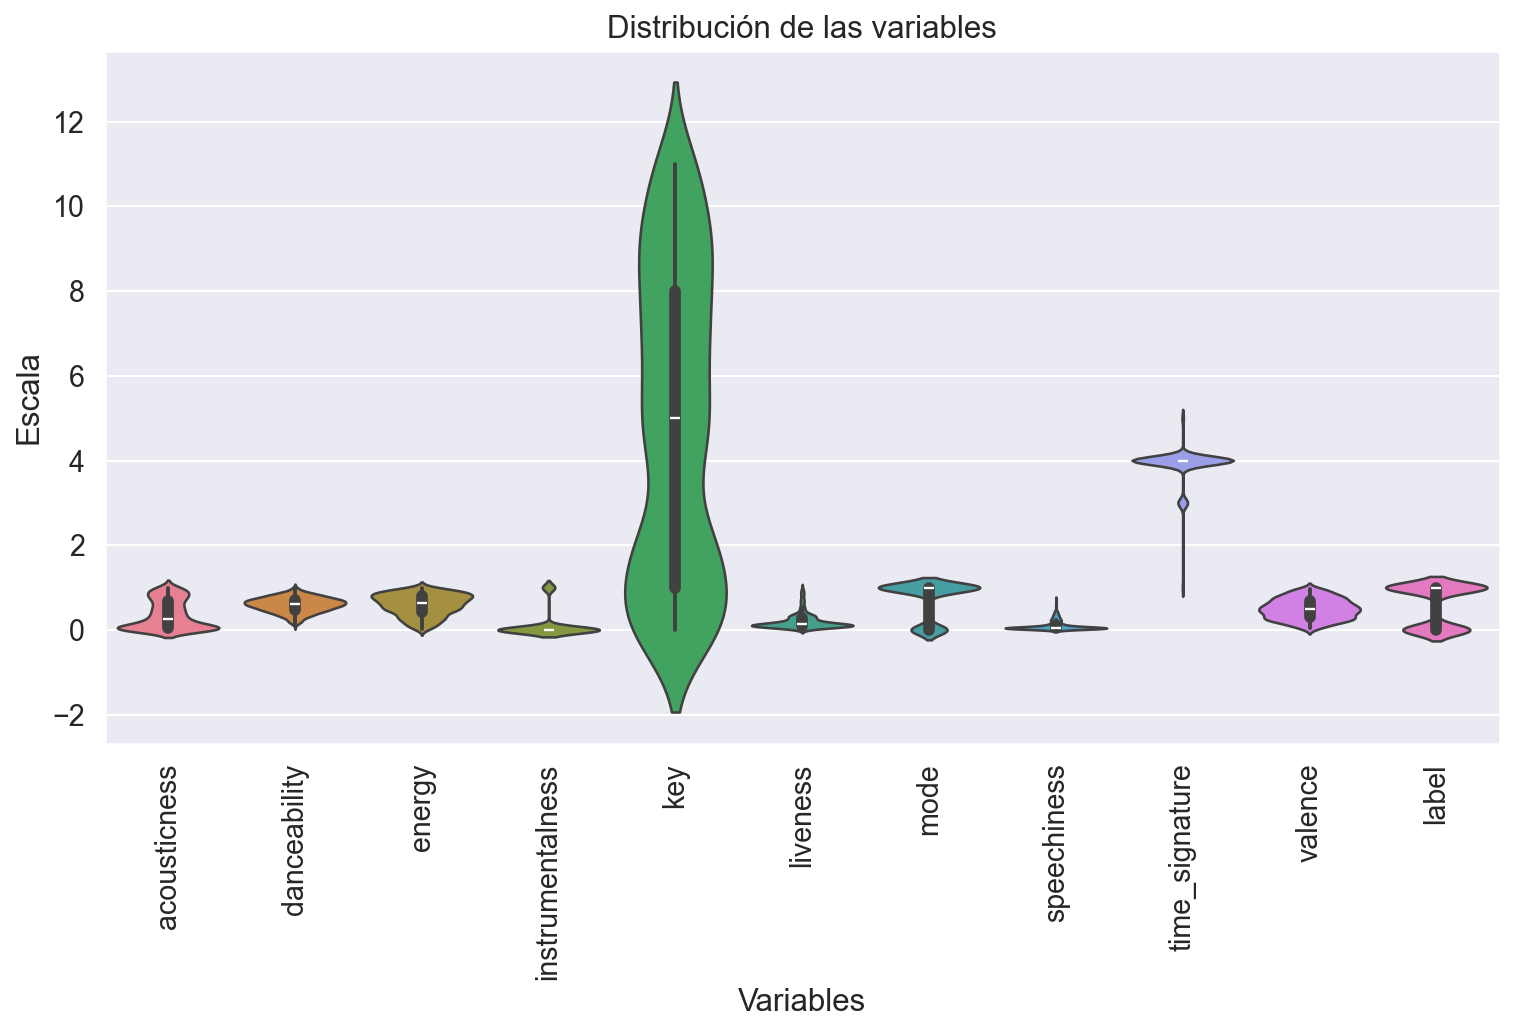

In [160]:
plt.figure( figsize = (12,6), dpi=150)
sns.violinplot( data=spotify_df_filter.drop(['duration','tempo','loudness'],axis=1))
plt.ylabel("Escala")
plt.xlabel("Variables")
plt.title("Distribución de las variables")
# Rotar etiquetas del eje X para evitar solapamiento
plt.xticks(rotation=90)

plt.show()

### Selección de features y entrenamiento de modelos

In [161]:
# Separamos el dataset: 30% testing - 70% training
from sklearn.model_selection import train_test_split

variables = ['acousticness', 'danceability','duration', 'energy', 
                       'valence', 'tempo', 'instrumentalness',
                        'key', 'loudness', 'speechiness', 'liveness','mode','time_signature']


spotify_target = spotify_df_filter_scaler['label']
spotify_data = spotify_df_filter_scaler[variables]

X_train, X_test, y_train, y_test = train_test_split(spotify_data, spotify_target, test_size=0.3, random_state=42)

print("Cantidad de muestras usadas para entrenar:",y_train.size)
print("Cantidad de muestras usadas para testear:",y_test.size)


Cantidad de muestras usadas para entrenar: 515
Cantidad de muestras usadas para testear: 221


In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Entrenar el modelo Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Precisión con todas las características: 0.76
Importancia de las características:
             Feature  Importance
6   instrumentalness    0.000000
11              mode    0.003987
12    time_signature    0.007361
7                key    0.010632
2           duration    0.034380
4            valence    0.043020
10          liveness    0.059413
3             energy    0.076350
1       danceability    0.078621
0       acousticness    0.085685
5              tempo    0.087218
8           loudness    0.144376
9        speechiness    0.368958


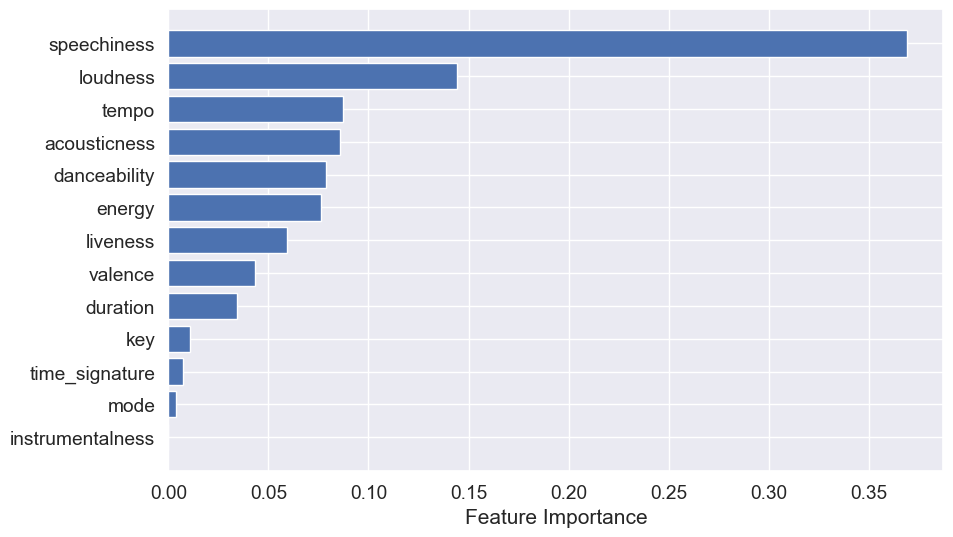

In [163]:
# Predecir y evaluar el modelo con todas las características
y_pred_all_features = model.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f'Precisión con todas las características: {accuracy_all_features:.2f}')

# Obtener la importancia de las características
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Mostrar la importancia de las características
print("Importancia de las características:")
print(feature_importance_df)

# # Ordenamos los índices
# sorted_idx = feature_importance_df.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.show()



**Los features con menor información son:**

- intrumentalness
- mode
- time_signature
- key

**Los features con mayor información son:**

- speechiness
- loudness
- tempo
- acousticness
- danceability


In [164]:
from xgboost import XGBClassifier
from sklearn.metrics import (mean_absolute_error, r2_score,
                             root_mean_squared_error, 
                             mean_absolute_percentage_error)

# Inicializamos XGBoost con sus hiperparámetros por defecto
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Calculamos las métricas
y_pred_xgb = xgb_model.predict(X_test)

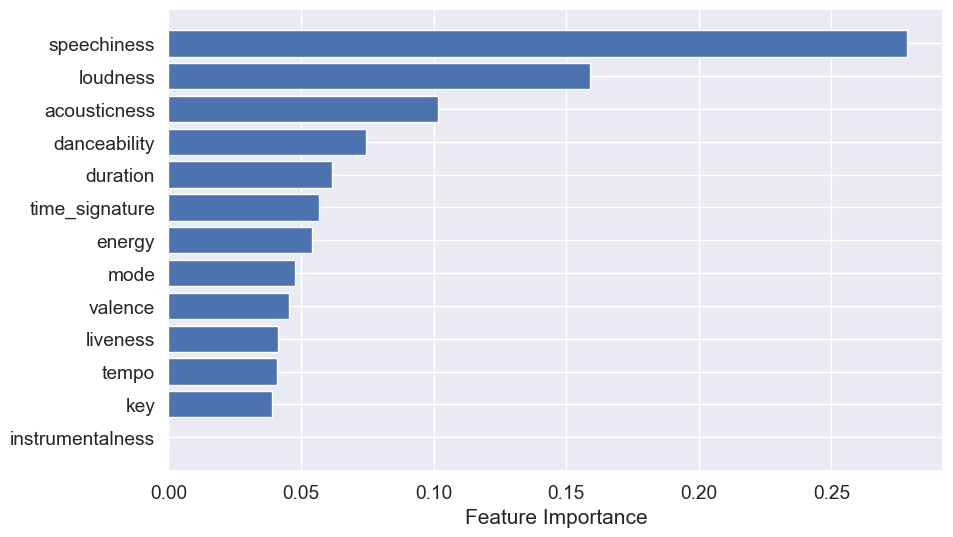

In [165]:
# Obtenemos la importancia de características
feature_importances = xgb_model.feature_importances_
feature_names = variables

# Ordenamos los índices
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

**Los features con menor información son:**
- intrumentalness

Los features con mayor información son:
- speechiness
- loudness
- acousticness
- danceability

**A partir de los modelos presentados anteriormente podemos observar que en ambos casos los features que menor informacion aportan son:**
- Instrumentalness

A su vez vemos que la mayor cantidad de información en ambos casos esta contenida en los features:
- Speechiness
- Danceability
- Acousticness
- Loudness


Con estos resultados podemos evaluar un modelo sencillo de regresión logística mediante el método de REcursive Feature elimination (RFE) para observar cual es el cambio de la exactitud al ir seleccionando datasets con mayor cantidad de features.


Número de características seleccionadas: 1
Características seleccionadas: Index(['speechiness'], dtype='object')
Exactitud del modelo: 0.74

Número de características seleccionadas: 2
Características seleccionadas: Index(['loudness', 'speechiness'], dtype='object')
Exactitud del modelo: 0.81

Número de características seleccionadas: 3
Características seleccionadas: Index(['acousticness', 'loudness', 'speechiness'], dtype='object')
Exactitud del modelo: 0.79

Número de características seleccionadas: 4
Características seleccionadas: Index(['acousticness', 'danceability', 'loudness', 'speechiness'], dtype='object')
Exactitud del modelo: 0.78

Número de características seleccionadas: 5
Características seleccionadas: Index(['acousticness', 'danceability', 'energy', 'loudness', 'speechiness'], dtype='object')
Exactitud del modelo: 0.81

Número de características seleccionadas: 6
Características seleccionadas: Index(['acousticness', 'danceability', 'duration', 'energy', 'loudness',
       's

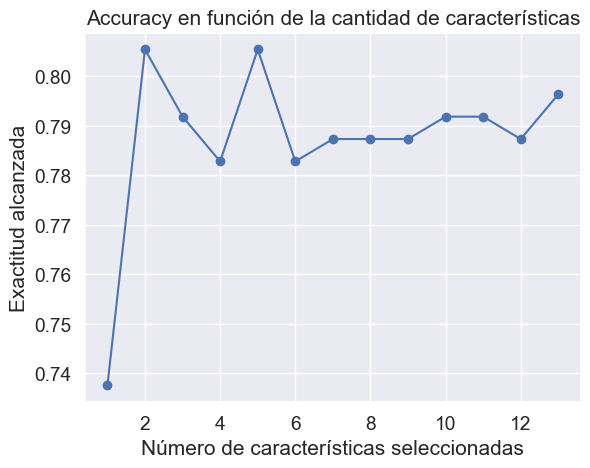

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

feature_names = X_train.columns

model = LogisticRegression(max_iter=10000)  # Sí o sí el modelo converge

gx=[]
gy=[]

feats = []

for i in range(1, 14):
    rfe = RFE(estimator=model, n_features_to_select=i)

    rfe.fit(X_train, y_train)

    X_train_selected = rfe.transform(X_train)
    X_test_selected = rfe.transform(X_test)

    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'\nNúmero de características seleccionadas: {rfe.n_features_}')
    print(f'Características seleccionadas: {feature_names[rfe.support_]}')
    print(f'Exactitud del modelo: {accuracy:.2f}')

    feats.append(feature_names[rfe.support_])
    gx.append(rfe.n_features_)
    gy.append(accuracy)

# Crear gráfico de línea
plt.plot(gx, gy, marker='o', linestyle='-', color='b')
plt.title('Accuracy en función de la cantidad de características')
plt.xlabel('Número de características seleccionadas')
plt.ylabel('Exactitud alcanzada')
plt.show()

median_value = np.median(gy)
indices = np.where(np.array(gy) == median_value)[0]

df_selection_2 = pd.DataFrame(data = {
    'RFE F': feats[gx[indices[0]]]
})


Finalmente se observa que tomando los 4 features más significativos: **Speechiness**, **acousticness**, **danceability** y **loudness**, la precisión del modelo ya encuentra su valor estable, aproximadamente en 0.8.

In [167]:
keep_variables = ['acousticness', 'danceability','loudness', 'speechiness']
X_train = X_train[keep_variables]
X_test = X_test[keep_variables]



# Utilización de Modelos

- Se evaluarán distintos modelos para predecir si una canción es del agrado del usuario o nó.
- Se compararán los distintos modelos por medio de diferentes métricas.
- Se seleccionará el mejor modelo para presentar resultados y conclusiones
- Los modelos a evaluar son:
    - Regresión Lineal
    - Regresión Lineal con ajuste de hiperparámetros
    - Clasificador KNN
    - Clasificador KNN con ajuste de hiperparámetros
    - XGBoost
    - XGBoost con ajuste de hiperparámetros

In [168]:
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, Perceptron
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


In [169]:
"""
Dibuja la matriz de confusión del modelo
"""
def showConfMatrix(y_ts, y_pred, classes, model_name, color='Blues', n_graph=2):
    ## Matriz de confusión
    cm = confusion_matrix(y_ts, y_pred)
    
    g_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

    fig, ax1 = plt.subplots(figsize=(7, 5))

    g_cm.plot(ax=ax1, cmap=color)
    ax1.set_title(model_name)
    ax1.set_xlabel('Predicción') 
    ax1.set_ylabel('Valor verdadero') 
    
    plt.tight_layout()
    plt.show()

    return cm.ravel()
    
"""
Muestra la curva ROC del modelo
Devuelve el área bajo la curva
"""

def showROC(y_ts, arr_models):

    plt.figure(figsize=(5, 5))
    auc_models = {}
    
    for model_name, color, y_probs in arr_models:
 
        fp, p, thresholds = roc_curve(y_ts, y_probs)
        plt.plot(fp, p, color=color, label=model_name)
        auc_models[model_name] = auc(fp, p)
        
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title('Curva ROC')
    plt.legend()
    plt.grid(True)
    plt.show()

    return auc_models

"""
Devuelve las métricas del modelo
"""
def getMetrics(y_ts, y_pred, cm, model_name):
    
    metrics = {}
    tn, fp, fn, tp = cm
    #TN (True Negatives): Verdaderos negativos.
    #FP (False Positives): Falsos positivos.
    #FN (False Negatives): Falsos negativos.
    #TP (True Positives): Verdaderos positivos.

    metrics[model_name] = [
        # Exactitud => Proporción de instancias correctamente clasificadas 
        #(tanto positivas como negativas) respecto al total de instancias.
        ["Accuracy", round(accuracy_score(y_ts, y_pred), 4)],
        # Precisión => cuántas de las predicciones positivas 
        # del modelo son realmente correctas.
        ["Precision", round(precision_score(y_ts, y_pred, zero_division=0), 4)],
        # Especificidad => qué tan bien el modelo puede identificar las instancias negativas 
        # y evitar clasificarlas incorrectamente como positivas
        ["Specificity",  round(tn / (tn + fp), 4)],     
        # Exactitud balanceada => considera el desbalance de clases al calcular la exactitud
        ["Balanced Accuracy",  round(((tp / (tp + fn)) + (tn / (tn + fp))) / 2, 4)], 
        # Sensibilidad = Recuperación => capacidad del modelo 
        #para identificar correctamente las instancias positivas.
        ["Recall", round(recall_score(y_ts, y_pred, zero_division=0), 4)], 
        # Equilibrio entre precisión y recuperación
        ["F1-Score", round(f1_score(y_ts, y_pred, zero_division=0), 4)], 
    ]

    return metrics

def printMetrics(metrics, n):
    
    model = next(iter(metrics))
    
    df_metrics = pd.DataFrame ([model], columns=['Modelo'])

    df_metrics['Nro. Features'] = n
   
    for metric, value in metrics[model]:
        df_metrics[metric] = value
    
    return df_metrics


In [170]:
#Funcion auxiliar para obtener métricas y comparar más fácilmente cada modelo
def obtener_metricas(df, nombre_modelo, y_test,y_predicted,tolerancia=2,unlog=True,display_results=True,replace_result=False):
    """Funcion auxiliar para obtener métricas y comparar más fácilmente cada modelo."""

    # Calculamos error del modelo (MAE,MSE,R2,etc)
    mae = mean_absolute_error(y_test, y_predicted)
    mape = mean_absolute_percentage_error(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    r2 = r2_score(y_test, y_predicted)

    metricas = {
        "Modelo": nombre_modelo,
        "MAE": mae,
        "MSE": mse,
        "RMSE": np.sqrt(mse),
        # "MAPE": mape,    
        "R2": r2,
    }

    # Creamos dataframe que se usará para graficar
    if unlog:
            y_test_ = np.exp(y_test)
            y_predicted_ = np.exp(y_predicted)
            
    df_comparacion = pd.DataFrame({
        'Actual': y_test_,
        'Predicted': np.round(y_predicted_),
    })

    df_comparacion['Muestra'] = df_comparacion.index
    df_comparacion['Error'] = df_comparacion['Actual']-df_comparacion['Predicted']
    df_comparacion["Acierto"] = 0
    df_comparacion.loc[abs(df_comparacion['Error'])<=tolerancia,"Acierto"] = 1
    correctos = len(df_comparacion[df_comparacion["Acierto"]==1])
    total = len(df_comparacion)
    precision = correctos/total

    #Agregamos precision al dataframe de métricas
    metricas['Precision'] = precision

    #Creamos dataframe con las métricas. Si ya existe un dataset con métricas y se le pasa a la funcion, concatena resultados
    df_result = pd.DataFrame([metricas])

    if df is None:
        final_df = df_result
    elif (not replace_result):
        final_df = pd.concat([df,df_result],ignore_index=True)
    else:
        df.loc[df["Modelo"]==nombre_modelo] = df_result
        final_df = df
    #Muestra de resultados (opcional)
    if display_results:    
        display(final_df)

    #Retornamos dataframe de resultados y el dataframe de comparacion (que se usará para graficar)
    return final_df,df_comparacion


### Regresión Logistica

In [171]:
def LogRegression (X_tr, y_tr, X_ts, y_ts):
    lregression = LogisticRegression(random_state = 42, class_weight="balanced")
    lregression.fit(X_tr, y_tr)

    y_pred_lr = lregression.predict(X_ts)
    y_probs_lr = lregression.predict_proba(X_ts)[:, -1]
    
    return y_pred_lr, lregression.classes_, y_probs_lr


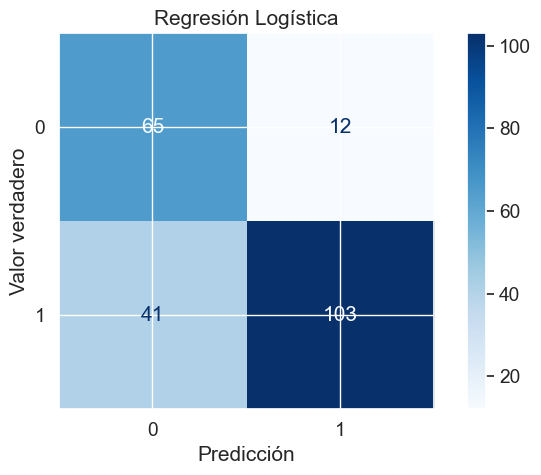

Modelo,Nro. Features,Accuracy,Precision,Specificity,Balanced Accuracy,Recall,F1-Score
Regresión Logística,13,0.760200,0.895700,0.844200,0.779700,0.715300,0.795400


In [172]:
mname = "Regresión Logística"
    
lr_y_pred, lr_classes, lr_y_probs = LogRegression (X_train, y_train, X_test, y_test)

confM = showConfMatrix(y_test, lr_y_pred, lr_classes, mname)

lr_metrics = getMetrics(y_test, lr_y_pred, confM, mname)

df_metrics_lr = printMetrics(lr_metrics, len(variables))

display(df_metrics_lr.style.hide(axis='index'))




### Regresión Logistica con ajuste de hiperparámetros

In [173]:
def LogRegressionHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, max_i, p_cv, metric):

    lregression = LogisticRegression(max_iter=max_i)
    grid_search = GridSearchCV(lregression, param_grid, cv=p_cv, scoring=metric)

    grid_search.fit(X_tr, y_tr)

    # Mejor modelo
    best_model = grid_search.best_estimator_
                                   
    y_pred_lr = best_model.predict(X_ts)

    y_probs_lr = best_model.predict_proba(X_ts)[:, -1]

    # Devuelve lo mismo que la función anterior + los mejores hiperparámetros encontrados
    return y_pred_lr, best_model.classes_, y_probs_lr, best_model

LogisticRegression(C=10, max_iter=1000, solver='liblinear')


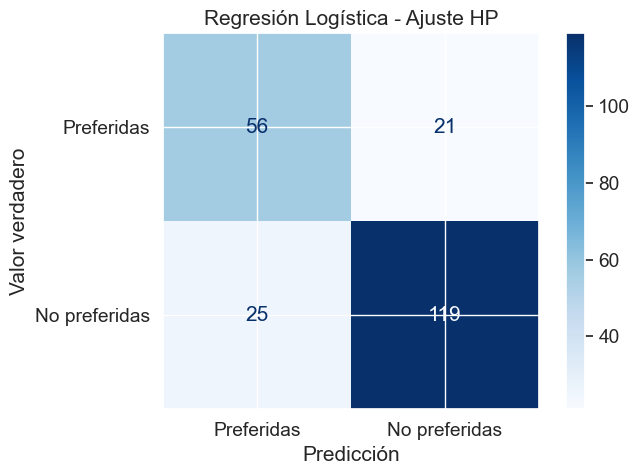

Modelo,Nro. Features,Accuracy,Precision,Specificity,Balanced Accuracy,Recall,F1-Score
Regresión Logística - Ajuste HP,13,0.791900,0.850000,0.727300,0.776800,0.826400,0.838000


In [174]:
mname = "Regresión Logística - Ajuste HP"

param_grid = {
    'C': [0.1, 1, 10, 100],  # Hiperparámetro para la regularización
    'solver': ['liblinear', 'lbfgs']  # Solvers para la optimización
}

# Utilizando Exactitud como la métrica de referencia
lrHp_y_pred, lrHp_classes, lrHp_y_probs, bestHp_p = LogRegressionHiperP (X_train, y_train, X_test, y_test, param_grid, 1000, 5, "accuracy")

print (bestHp_p)

confM = showConfMatrix(y_test, lrHp_y_pred, list(map(lambda x: target_esn[x], lrHp_classes)), mname, 'Blues', n_graph=1)

lrHP_metrics = getMetrics(y_test, lrHp_y_pred, confM, mname)

df_metrics = printMetrics(lrHP_metrics, len(variables))

display(df_metrics.style.hide(axis='index'))



### Clasificador KNN

In [175]:
def Knn (X_tr, y_tr, X_ts, y_ts):

    knn = KNeighborsClassifier()
    knn.fit(X_tr, y_tr)
        
    # Obtener las predicciones en el conjunto de prueba
    y_pred_knn = knn.predict(X_ts)
    y_probs_knn = knn.predict_proba(X_ts)[:, -1]

    return y_pred_knn, knn.classes_, y_probs_knn

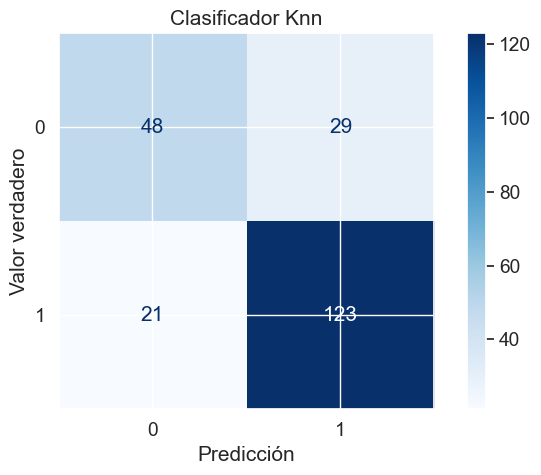

Modelo,Nro. Features,Accuracy,Precision,Specificity,Balanced Accuracy,Recall,F1-Score
Clasificador Knn,13,0.773800,0.809200,0.623400,0.738800,0.854200,0.831100


In [176]:
mname = "Clasificador Knn"
    
knn_y_pred, knn_classes, knn_y_probs = Knn (X_train, y_train, X_test, y_test)

confM = showConfMatrix(y_test, knn_y_pred, knn_classes, mname)

knn_metrics = getMetrics(y_test, knn_y_pred, confM, mname)

df_metrics = printMetrics(knn_metrics, len(variables))

display(df_metrics.style.hide(axis='index'))


### Clasificador KNN con Ajuste de Hiperparámetros

In [177]:
def KnnHiperP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    knn = KNeighborsClassifier()

    # Búsqueda de hiperparámetros por GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=p_cv, scoring=metric)

    grid_search.fit(X_tr, y_tr)

    # Obtener los mejores hiperparámetros
    best_model = grid_search.best_estimator_
        
    # Obtener las predicciones en el conjunto de prueba
    y_pred_knn = best_model.predict(X_ts)

    return y_pred_knn, best_model.classes_, best_model

KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')


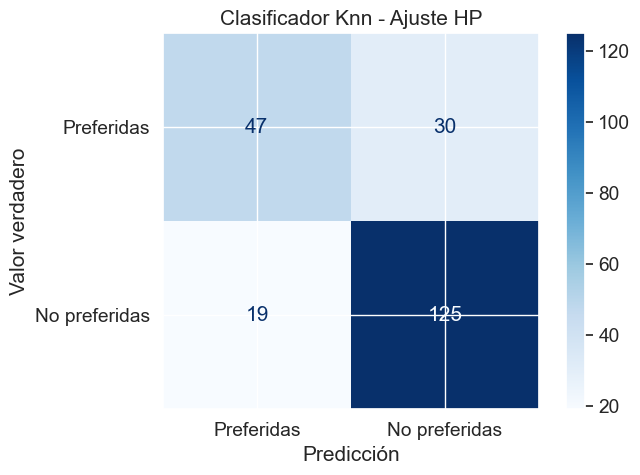

Modelo,Nro. Features,Accuracy,Precision,Specificity,Balanced Accuracy,Recall,F1-Score
Clasificador Knn - Ajuste HP,13,0.778300,0.806500,0.610400,0.739200,0.868100,0.836100


In [178]:
# Grilla de hiperparámetros
param_grid = {
    'n_neighbors': [4,6,8,10,12],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'weights': ['distance', 'uniform']
}

mname = "Clasificador Knn - Ajuste HP"

# Utilizando Exactitud como la métrica de referencia
knnHp_y_pred, knnHp_classes, knnHP_bestModel = KnnHiperP (X_train, y_train, X_test, y_test, param_grid, 5, "accuracy")

print(knnHP_bestModel)

confM = showConfMatrix(y_test, knnHp_y_pred, list(map(lambda x: target_esn[x], lrHp_classes)), mname, 'Blues', n_graph=1)

knnHp_metrics = getMetrics(y_test, knnHp_y_pred, confM, mname)

df_metrics = printMetrics(knnHp_metrics, len(variables))

display(df_metrics.style.hide(axis='index'))



### XGBoost

In [179]:
import xgboost as xgb

def XGBoostM (X_tr, y_tr, X_ts, y_ts):

    # Inicializamos XGBoost con sus hiperparámetros por defecto
    xgb_model = XGBClassifier()
    xgb_model.fit(X_tr, y_tr)
    
    # Calculamos las métricas
    y_pred_xgb = xgb_model.predict(X_ts)
    y_probs_knn = xgb_model.predict_proba(X_ts)[:, -1]

    return y_pred_xgb, xgb_model.classes_, y_probs_knn

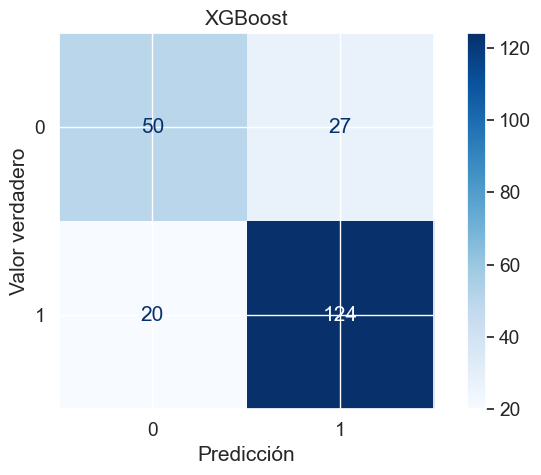

Modelo,Nro. Features,Accuracy,Precision,Specificity,Balanced Accuracy,Recall,F1-Score
XGBoost,13,0.787300,0.821200,0.649400,0.755200,0.861100,0.840700


In [180]:
mname = "XGBoost"
    
xgb_y_pred, xgb_classes, xgb_y_probs = XGBoostM (X_train, y_train, X_test, y_test)

confM = showConfMatrix(y_test, xgb_y_pred, xgb_classes, mname)

xgb_metrics = getMetrics(y_test, xgb_y_pred, confM, mname)

df_metrics = printMetrics(xgb_metrics, len(variables))

display(df_metrics.style.hide(axis='index'))

### XGBoost con ajuste de hiperparametros

In [181]:
def XGBoostMHP (X_tr, y_tr, X_ts, y_ts, param_grid, p_cv, metric):

    model = xgb.XGBClassifier()
    
    # Realiza la busqueda de hiperparámetros con GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=metric, cv=p_cv, n_jobs=-1, verbose=1)

    # Entrena el modelo
    grid_search.fit(X_tr, y_tr)

    # Obtiene los mejores hiperparámetros
    best_model = grid_search.best_estimator_

    # Obtiene las predicciones en el conjunto de prueba
    y_pred_xgb = best_model.predict(X_ts)

    y_probs_xgb = best_model.predict_proba(X_ts)[:, -1]
    
    return y_pred_xgb, best_model.classes_, y_probs_xgb, best_model




Fitting 5 folds for each of 54 candidates, totalling 270 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


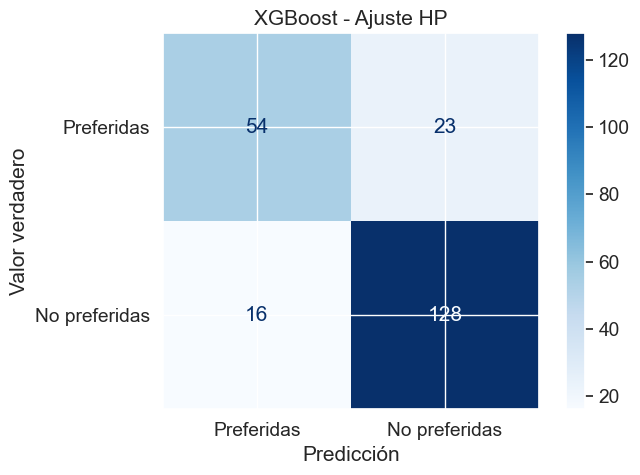

Modelo,Nro. Features,Accuracy,Precision,Specificity,Balanced Accuracy,Recall,F1-Score
XGBoost - Ajuste HP,13,0.823500,0.847700,0.701300,0.795100,0.888900,0.867800


In [182]:
# Grilla de hiper-parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
}

mname = "XGBoost - Ajuste HP"

# Utilizando Exactitud como la métrica de referencia
xgbHp_y_pred, xgbHp_classes, xgbHP_y_probs ,xgbHP_bestModel = XGBoostMHP (X_train, y_train, X_test, y_test, param_grid, 5, "accuracy")

print(xgbHP_bestModel)

confM = showConfMatrix(y_test, xgbHp_y_pred, list(map(lambda x: target_esn[x], lrHp_classes)), mname, 'Blues', n_graph=1)

xgbHp_metrics = getMetrics(y_test, xgbHp_y_pred, confM, mname)

df_metrics = printMetrics(xgbHp_metrics, len(variables))

display(df_metrics.style.hide(axis='index'))

## Comparación de modelos

In [183]:
metrics = [lr_metrics,lrHP_metrics,knn_metrics,knnHp_metrics,xgb_metrics,xgbHp_metrics]
df_metrics = pd.DataFrame(columns=['Modelo','Accuracy','Precision',
                                'Specificity','Balanced Accuracy','Recall',
                                'F1-Score'])

for metric in metrics:
    model = next(iter(metric))
    row = [model]
    for title, value in metric[model]:
        row.append(value)
    df_metrics.loc[len(df_metrics.index)] = row

df_metrics


,Modelo,Accuracy,Precision,Specificity,Balanced Accuracy,Recall,F1-Score
0,Regresión Logística,0.7602,0.8957,0.8442,0.7797,0.7153,0.7954
1,Regresión Logística - Ajuste HP,0.7919,0.8500,0.7273,0.7768,0.8264,0.8380
2,Clasificador Knn,0.7738,0.8092,0.6234,0.7388,0.8542,0.8311
3,Clasificador Knn - Ajuste HP,0.7783,0.8065,0.6104,0.7392,0.8681,0.8361
4,XGBoost,0.7873,0.8212,0.6494,0.7552,0.8611,0.8407
5,XGBoost - Ajuste HP,0.8235,0.8477,0.7013,0.7951,0.8889,0.8678


### Conclusiones:

- A partir de estos resultados, se puede observar que todos los modelos performan bastante bien, con un F1-Score mayor a 0.79, lo que evidencia la correcta selección de features realizada anteriormente. 

- Por su gran capacidad de performance, el modelo XGBoost es el que mejor performa en términos de Accuray y F1-Score, en comparación con el Clasificador Knn y la regresión logística.

- Finalmente, se observa como en todos los casos el ajuste de hiperparámetros por medio de del **GridSearchCV**, mejora el rendimiento de todos los modelos, siendo la regresión logística el modelo que más se ve afectado por este mecanismo y el clasificador Knn el modelo que menos se ve afectado.